## Distribution Focal Loss for Bounding Box RegressionDistribution Focal Loss for Bounding Box Regression

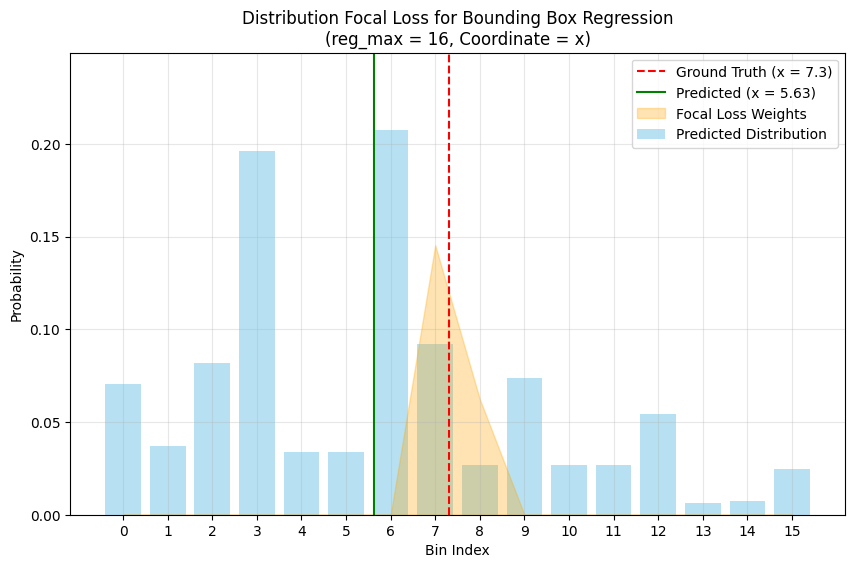

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Parameters
reg_max = 16  # Number of bins
coordinate = 'x'  # Visualizing the x-coordinate
ground_truth = 7.3  # Example ground truth value for x

# Simulate model output (logits before softmax)
np.random.seed(42)
logits = np.random.randn(reg_max)  # Random logits for demonstration
probs = softmax(logits)  # Convert to probabilities
bins = np.arange(reg_max)  # Bin indices [0, 1, ..., 15]

# Compute predicted coordinate (expected value)
predicted = np.sum(bins * probs)

# Simulate focal loss weights (simplified for visualization)
# Focus on bins near the ground truth
gt_floor = int(np.floor(ground_truth))
gt_ceil = int(np.ceil(ground_truth))
focal_weights = np.zeros(reg_max)
if gt_floor == gt_ceil:
    focal_weights[gt_floor] = 1.0
else:
    focal_weights[gt_floor] = gt_ceil - ground_truth
    focal_weights[gt_ceil] = ground_truth - gt_floor

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(bins, probs, alpha=0.6, color='skyblue', label='Predicted Distribution')
plt.axvline(ground_truth, color='red', linestyle='--', label=f'Ground Truth ({coordinate} = {ground_truth})')
plt.axvline(predicted, color='green', linestyle='-', label=f'Predicted ({coordinate} = {predicted:.2f})')

# Add focal loss weights as a shaded area
plt.fill_between(bins, 0, focal_weights * max(probs), color='orange', alpha=0.3, label='Focal Loss Weights')

# Customize plot
plt.xlabel('Bin Index')
plt.ylabel('Probability')
plt.title('Distribution Focal Loss for Bounding Box Regression\n(reg_max = 16, Coordinate = x)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(bins)
plt.ylim(0, max(probs) * 1.2)

# Save and show plot
plt.savefig('dfl_visualization.png')
plt.show()